In [1]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import astropy.units as u
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
mh = '+0.0'
CtoO = '1.0'


filename_db="/Users/sagnickmukherjee/Documents/GitHub/picaso-dev/reference/opacities/ck_cx_cont_opacities.db"
ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/sonora_2020_feh+000_co_100.data.196'

opacity_ck = jdi.opannection(ck=True, ck_db=ck_db,filename_db=filename_db)


In [3]:
T_eff= 700
grav = 3160
nlevel = 91

## Brown Dwarf 
T_star = "NA"
semi_major = "NA" # AU
self_consistent_kzz= False # Only needed if you want to do on-the-fly calculation with MLT Kzz
##


# Lets use Kzz = 1d4 in cgs

In [4]:
cl_run = jdi.inputs(calculation="brown", climate = True)

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)'))
cl_run.T_eff(Teff=T_eff)




pressure=np.logspace(np.log10(1.77000392e-04),np.log10(205.0),nlevel) # set your pressure grid
temp_guess = np.zeros(shape=(nlevel))
kz = np.zeros(shape =(nlevel))

## load a bobcat model
pressure_dummy,temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(700)+"g3160"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)

for i in range(len(temp_guess)):
    temp_guess[i] = temp_guess[i] # perturb the profile
    kz[i] = 1e4 #0
    
nofczns = 1
nstr = np.array([0,86,89,0,0,0]) # initial guess of convective zones
rfacv = 0.0
rfaci =1.0
cloudy = False # not cloudy
fsed = 0.0

In [5]:
cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure, nstr = nstr, nofczns = nofczns , rfacv = rfacv, rfaci = rfaci, cloudy = cloudy, mh = mh, CtoO = CtoO,species = ['MgSiO3','Mg2SiO4','Fe'], fsed = fsed)


In [6]:
t0 = time.time()
pressure , temp, dtdp, nstr_new, flux_plus_final,quench_levels, df, all_profiles, all_kzz = cl_run.run_climate_model(opacity_ck,save_all_profiles=True, save_all_kzz = True,diseq_chem = True, self_consistent_kzz =self_consistent_kzz, kz = kz,vulcan_run = False)
t1 = time.time()

Iteration number  0 , min , max temp  216.9664540346099 2069.579956867619 , flux balance  0.48255159361906097
Iteration number  1 , min , max temp  219.34867035538568 1951.8644320158578 , flux balance  0.0647510329438603
Iteration number  2 , min , max temp  219.2634452307011 1931.739277860843 , flux balance  0.001876422186727212
Iteration number  3 , min , max temp  219.26101724280554 1931.1861623664029 , flux balance  2.347795451478059e-06
Converged Solution in iterations  3
Big iteration is  219.26101724280554 0
Iteration number  0 , min , max temp  216.0140408805682 1899.206735181965 , flux balance  0.0024325362661042327
Iteration number  1 , min , max temp  215.91124015791755 1897.7587327207427 , flux balance  4.32371055945737e-06
Converged Solution in iterations  1
Big iteration is  215.91124015791755 1
Iteration number  0 , min , max temp  215.82249370517877 1895.3103004801073 , flux balance  5.1762467089705025e-05
Iteration number  1 , min , max temp  215.82434252029427 1895.30

In [10]:
pphil_deq,tphil_deq = np.loadtxt("Benchmarking/chem_T700_lg5.5_NEQ_strong.txt",usecols=[1,2],unpack=True)


Text(0.5, 1.0, 'T$_{\\rm eff}$= 1000 K, log(g)=5.0')

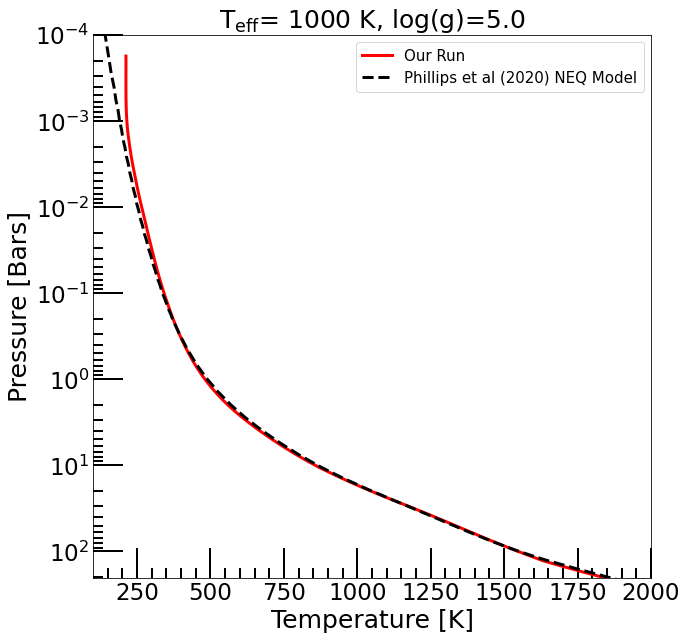

In [12]:
pressure_bobcat,temp_bobcat = np.loadtxt("/Users/sagnickmukherjee/Documents/GitHub/Disequilibrium-Picaso/t"+str(1000)+"g1000"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)

plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.ylim(205,1e-4)
plt.xlim(100,2000)

plt.semilogy(temp,pressure,color="r",linewidth=3,label="Our Run")
plt.semilogy(tphil_deq,pphil_deq,color="k",linestyle="--",linewidth=3,label="Phillips et al (2020) NEQ Model")


plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

plt.title(r"T$_{\rm eff}$= 1000 K, log(g)=5.0",fontsize=25)

